In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv('C:/Users/extra/taxis_bikes_nycity.csv')

In [45]:
df.head(10)

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN
5,8/8/15,3.40,NaN
6,8/9/15,2.50,NaN
7,8/10/15,3.36,0:28:37
8,8/11/15,1.67,0:13:07
9,8/12/15,1.42,0:10:35


In [46]:
df.columns

Index(['Data', 'Distancia', 'Tempo'], dtype='object')

In [47]:
df.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

In [48]:
df['Data'].head()

0    8/2/15
1    8/3/15
2    8/4/15
3    8/6/15
4    8/7/15
Name: Data, dtype: object

In [49]:
##durante a importação do arquivo ja posso dizer a uma coluna que ele é do tipo data
df = pd.read_csv('C:/Users/extra/taxis_bikes_nycity.csv', parse_dates=['Data'])

In [50]:
df.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [51]:
df.set_index('Data', inplace=True)

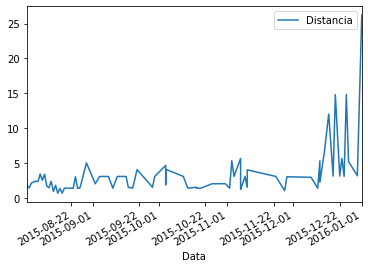

In [52]:
#vizualizando os graficos
df.plot()

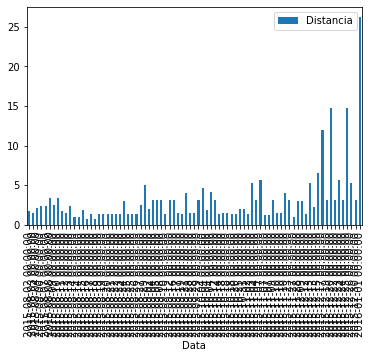

In [53]:
df.plot(kind='bar')

Text(0, 0.5, 'Count')

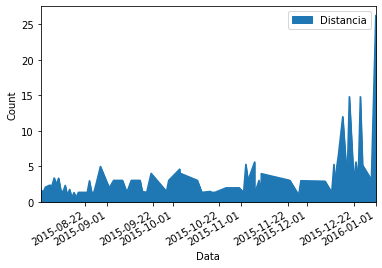

In [54]:
df.plot(kind='area')
plt.ylabel('Count')

In [55]:
df.describe()

,Distancia
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [56]:
#retornar os dados de um mes especifico
df['2015-11']

,Distancia,Tempo
Data,,
2015-11-02,1.37,0:08:43
2015-11-03,5.30,0:39:26
2015-11-04,3.05,0:22:12
2015-11-07,5.63,0:49:05
2015-11-07,1.26,NaN
2015-11-07,1.20,NaN
2015-11-09,3.05,0:22:36
2015-11-10,1.50,0:09:00
2015-11-10,1.50,0:11:33


In [57]:
#contabilizar quantos registros eu tenho por exemplo para o mes 
len(df['2015-11'])

13

In [58]:
from datetime import datetime
start = datetime(2015,8,1)
end = datetime(2015,1,2)

In [59]:
start = df.index.min()
end = df.index.max()
print(start,end)

2015-08-02 00:00:00 2016-01-01 00:00:00


In [60]:
df2 = pd.DataFrame(index = pd.date_range(start,end))

In [61]:
df2.head()

""
2015-08-02
2015-08-03
2015-08-04
2015-08-05
2015-08-06


In [62]:
df.join(df2).head(10)

,Distancia,Tempo
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07
2015-08-12,1.42,0:10:35


In [63]:
##subistituir valores NaN
df.Distancia.fillna(0,inplace=True)

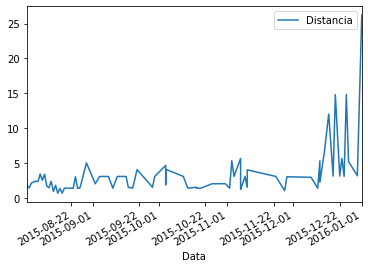

In [64]:
df.plot()

In [42]:
#salvanndo mod em csv
df.to_csv('dataframe_saved_v1.csv')

In [2]:
df = pd.read_csv('dataframe_saved_v1.csv', parse_dates=['Data'])

In [3]:
df.head()

,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [4]:
df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [5]:
cols = ['Data', 'Distancia', 'Tempo']
df.colums = cols
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [6]:
#vou setar a data como meu novo indice
df.set_index('Data', inplace = True)

In [7]:
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


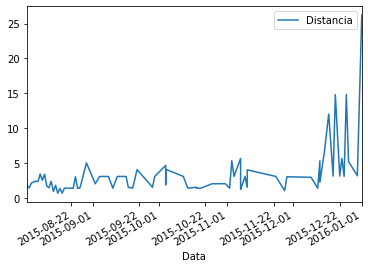

In [8]:
df.plot()

In [9]:
#converte a coluna que tem tempo, quebrar em hora, min e segundos, separar os elementos e gerar novas colunas
tempo_idx_0 = df.Tempo[0]

def calcula_total_segundos(time):
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds
print(calcula_total_segundos(tempo_idx_0))

nan


In [10]:
#vou adicionar mais uma coluna no meu df
df['Segundos'] = df.Tempo.map(calcula_total_segundos)

In [11]:
df.head(10)

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [12]:
df.describe()

,Distancia,Segundos
count,81.000000,52.000000
mean,3.137531,1901.788462
std,3.634519,2560.424171
min,0.650000,376.000000
25%,1.370000,583.750000
50%,2.100000,1343.500000
75%,3.050000,1743.250000
max,26.200000,15643.000000


In [13]:
 df['Minutos'] = df['Segundos'].map(lambda x:x/60)

In [14]:
df.head(10)

,Distancia,Tempo,Segundos,Minutos
Data,,,,
2015-08-02,1.70,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667
2015-08-11,1.67,0:13:07,787.0,13.116667


In [15]:
df.fillna(0).describe()

,Distancia,Segundos,Minutos
count,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354
std,3.634519,2240.756985,37.345950
min,0.650000,0.000000,0.000000
25%,1.370000,0.000000,0.000000
50%,2.100000,573.000000,9.550000
75%,3.050000,1426.000000,23.766667
max,26.200000,15643.000000,260.716667


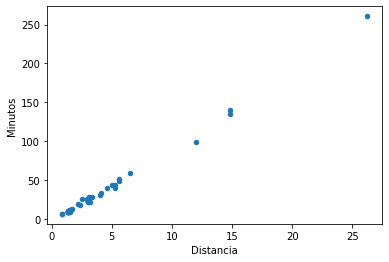

In [16]:
df.plot(x = 'Distancia', y = 'Minutos', kind = 'scatter' )

In [17]:
#coeficiente de corelação
df.corr()

,Distancia,Segundos,Minutos
Distancia,1.000000,0.997203,0.997203
Segundos,0.997203,1.000000,1.000000
Minutos,0.997203,1.000000,1.000000


In [18]:
df['Min_Por_Km'] = df['Minutos'] / df['Distancia']

In [19]:
df.head(10)

,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
Data,,,,,
2015-08-02,1.70,NaN,NaN,NaN,NaN
2015-08-03,1.40,NaN,NaN,NaN,NaN
2015-08-04,2.10,NaN,NaN,NaN,NaN
2015-08-06,2.38,NaN,NaN,NaN,NaN
2015-08-07,2.30,NaN,NaN,NaN,NaN
2015-08-08,3.40,NaN,NaN,NaN,NaN
2015-08-09,2.50,NaN,NaN,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865
2015-08-11,1.67,0:13:07,787.0,13.116667,7.854291


In [20]:
#retiras os espações em branco 
df.fillna(0).describe()

,Distancia,Segundos,Minutos,Min_Por_Km
count,81.000000,81.000000,81.000000,81.000000
mean,3.137531,1220.901235,20.348354,4.959450
std,3.634519,2240.756985,37.345950,3.803856
min,0.650000,0.000000,0.000000,0.000000
25%,1.370000,0.000000,0.000000,0.000000
50%,2.100000,573.000000,9.550000,6.962963
75%,3.050000,1426.000000,23.766667,7.792350
max,26.200000,15643.000000,260.716667,10.000000


Text(0, 0.5, 'Minutos/Km')

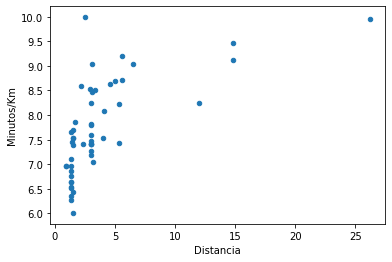

In [21]:
df.plot(x = 'Distancia', y = 'Min_Por_Km', kind = 'scatter')
plt.ylabel("Minutos/Km")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226D3499308>]],
      dtype=object)

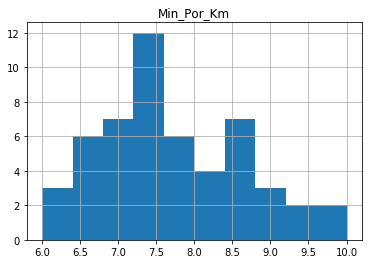

In [22]:
df.hist('Min_Por_Km')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226D35076C8>]],
      dtype=object)

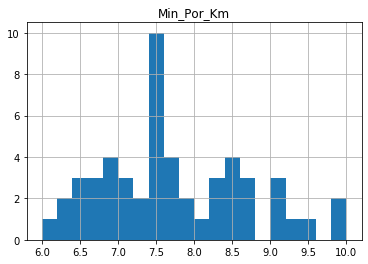

In [23]:
df.hist('Min_Por_Km', bins = 20)

AttributeError: module 'matplotlib.pyplot' has no attribute 'salvefig'

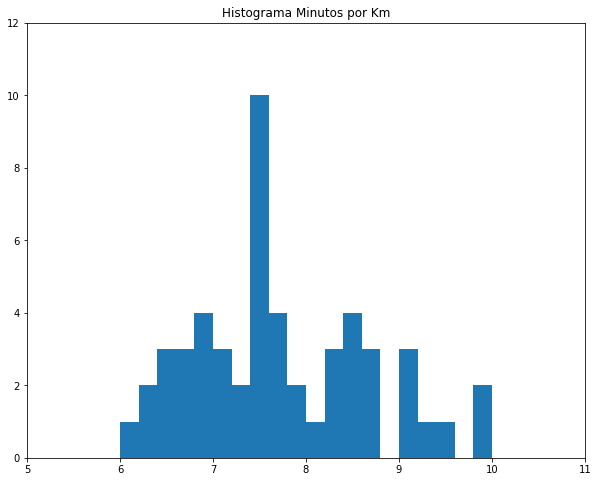

In [24]:
df.hist('Min_Por_Km', bins = 20, figsize = (10,8))
plt.xlim((5,11))
plt.ylim((0,12))
plt.title("Histograma Minutos por Km")
plt.grid(False)
plt.salvefig('hist_min_km')

In [25]:
## improtante sempre lembrar de ir salvando as informações modificadas 
df.to_csv('dataframe_saved_v2.csv') 